#**HANDWRITEN DIGIT RECOGNITION FOR MNIST DATASET**

The goal is to recognize handwritten digits from MNIST dataset.

**1. Load dataset**

In [1]:
from keras.datasets import mnist

In [2]:
#train test split
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**2. Data Preprocessing**

In [3]:
#pixel value normalization to [0,1] and flattening
x_train = x_train.reshape(-1, 28,28,1).astype('float32')/255
x_test = x_test.reshape(-1, 28,28,1).astype('float32')/255

In [4]:
#convert labels to numerical using ome=hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**3. Build the model**

building a neural network model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation ='relu', input_shape=(28, 28,1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  #reduces overfitting
    Dense(10, activation='softmax')
])    

**4. Model Compilation**

In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

**5. Model Training**

In [10]:
model.fit(
    x_train, y_train,
    validation_split=0.2,   #20% of data used for validation
    epochs=20, # no.of training iterations
    batch_size=64,  #no.ofsamples per epoch
    verbose=1 # show training progress
)    

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8091 - loss: 0.5986 - val_accuracy: 0.9797 - val_loss: 0.0682
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9704 - loss: 0.0986 - val_accuracy: 0.9862 - val_loss: 0.0509
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9783 - loss: 0.0728 - val_accuracy: 0.9884 - val_loss: 0.0378
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9835 - loss: 0.0565 - val_accuracy: 0.9881 - val_loss: 0.0409
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9866 - loss: 0.0430 - val_accuracy: 0.9877 - val_loss: 0.0413
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9878 - loss: 0.0422 - val_accuracy: 0.9898 - val_loss: 0.0386
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9894 - loss: 0.0373 - val_accuracy: 0.9902 - val_loss: 0.0347
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9899 - loss: 0.0318 - 

**6.Model Evaluation**

In [11]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print(f"Test Accuracy:{test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9910 - loss: 0.0336
Test Accuracy:0.992900013923645


**7. Visualize Predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


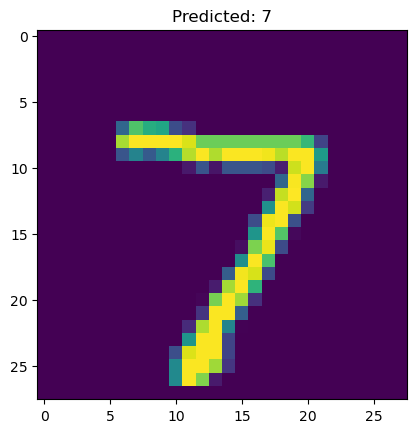

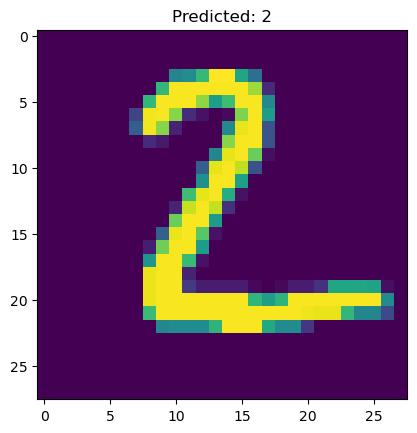

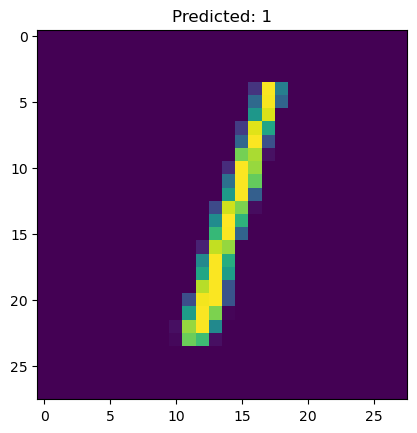

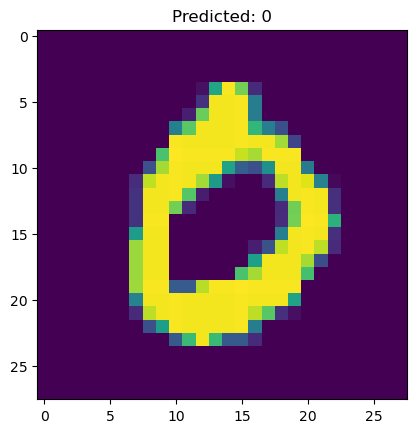

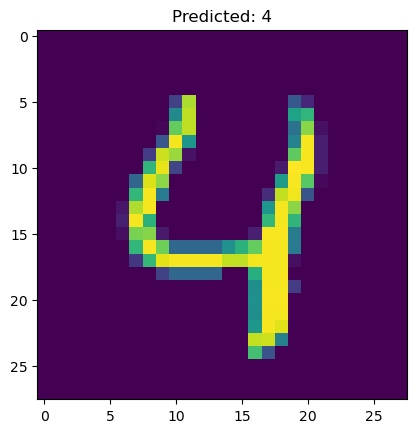

In [12]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(x_test)
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.show()

**# CHECK WITH REAL TIME DATA**

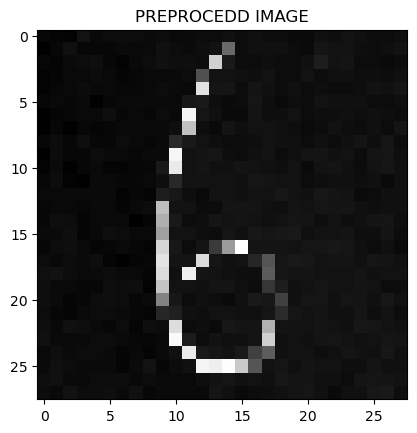

In [21]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

#load the image

image_path = 'digit image.jpg'   #replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  #read as grayscale

#resize the image to 28x28
img_resized = cv2.resize(img, (28, 28))

#invert colors (if the background is white and the digit is black)
img_inverted = 255 - img_resized

#normalize the pixel values
img_normalized = img_inverted / 255.0


#flatten the 

img_reshaped = img_normalized.reshape(1, 28, 28, 1).astype('float32')

#show the  preprocedded image
plt.imshow(img_normalized, cmap='gray')
plt.title("PREPROCEDD IMAGE")
plt.show()

In [22]:
#make a prediction
prediction = model.predict(img_reshaped)
predicted_digit = np.argmax(prediction)

print(f"The model predicts the digit as: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
The model predicts the digit as: 6


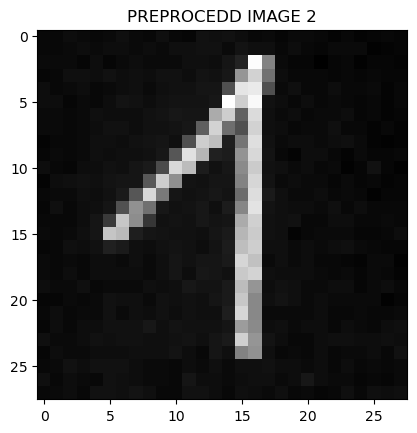

In [23]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

#load the image

image_path = 'digit one.jpg'   #replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  #read as grayscale

#resize the image to 28x28
img_resized = cv2.resize(img, (28, 28))

#invert colors (if the background is white and the digit is black)
img_inverted = 255 - img_resized

#normalize the pixel values
img_normalized = img_inverted / 255.0


#flatten the 

img_reshaped = img_normalized.reshape(1, 28, 28, 1).astype('float32')

#show the  preprocedded image
plt.imshow(img_normalized, cmap='gray')
plt.title("PREPROCEDD IMAGE 2")
plt.show()

In [24]:
#make a prediction
prediction = model.predict(img_reshaped)
predicted_digit = np.argmax(prediction)

print(f"The model predicts the digit as: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
The model predicts the digit as: 1


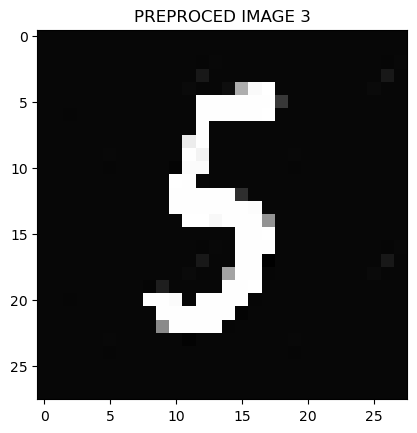

In [18]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

#load the image

image_path = 'pngtree-black-deformation-number-5-png-image_2787111.png'   #replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  #read as grayscale

#resize the image to 28x28
img_resized = cv2.resize(img, (28, 28))

#invert colors (if the background is white and the digit is black)
img_inverted = 255 - img_resized

#normalize the pixel values
img_normalized = img_inverted / 255.0


#flatten the 

img_reshaped = img_normalized.reshape(1, 28, 28, 1).astype('float32')

#show the  preprocedded image
plt.imshow(img_normalized, cmap='gray')
plt.title("PREPROCED IMAGE 3")
plt.show()

In [20]:
#make a prediction
prediction = model.predict(img_reshaped)
predicted_digit = np.argmax(prediction)

print(f"The model predicts the digit as: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
The model predicts the digit as: 5


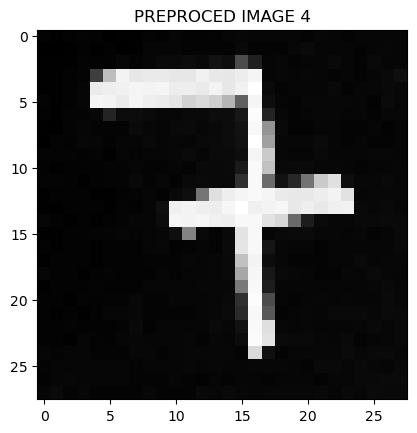

In [25]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

#load the image

image_path = 'digit seven.jpg'   #replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  #read as grayscale

#resize the image to 28x28
img_resized = cv2.resize(img, (28, 28))

#invert colors (if the background is white and the digit is black)
img_inverted = 255 - img_resized

#normalize the pixel values
img_normalized = img_inverted / 255.0


#flatten the 

img_reshaped = img_normalized.reshape(1, 28, 28, 1).astype('float32')

#show the  preprocedded image
plt.imshow(img_normalized, cmap='gray')
plt.title("PREPROCED IMAGE 4")
plt.show()

In [26]:
#make a prediction
prediction = model.predict(img_reshaped)
predicted_digit = np.argmax(prediction)

print(f"The model predicts the digit as: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
The model predicts the digit as: 7
